# Tutorial on MetaSynth-disclosure

In this tutorial, we will show how to use the MetaSynth disclosure control plugin. It uses the same procedure as the base MetaSynth [package](https://github.com/sodascience/metasynth/blob/main/examples/advanced_tutorial.ipynb). The output format will be the same: a GMF file will be created with the same parameter types as with the base package. One difference is that not all distributions are implemented by the disclosure plugin. The missing distributions will not be fit by default, but they can be manually set.

In [1]:
# import required packages
import datetime as dt
import polars as pl
from metasynth import MetaDataset
from utils import get_demonstration_fp

## Transforming your data into a polars DataFrame

The first step in creating the metadata is reading and converting your dataset to a polars DataFrame. 

In [2]:
demonstration_fp = get_demonstration_fp()
df = pl.read_csv(
    demonstration_fp, parse_dates=True,
    dtypes={
        "Sex": pl.Categorical,
        "Embarked": pl.Categorical})
df.head()

PassengerId,Name,Sex,Age,Parch,Fare,Cabin,Embarked,Birthday,Board time,Married since,all_NA
i64,str,cat,i64,i64,f64,str,cat,date,time,datetime[μs],str
1,"""Braund, Mr. Ow...","""male""",22,0,7.25,null,"""S""",1937-10-28,15:53:04,2022-08-05 04:43:34,null
2,"""Cumings, Mrs. ...","""female""",38,0,71.2833,"""C85""","""C""",null,12:26:00,2022-08-07 01:56:33,null
3,"""Heikkinen, Mis...","""female""",26,0,7.925,null,"""S""",1931-09-24,16:08:25,2022-08-04 20:27:37,null
4,"""Futrelle, Mrs....","""female""",35,0,53.1,"""C123""","""S""",1936-11-30,null,2022-08-07 07:05:55,null
5,"""Allen, Mr. Wil...","""male""",35,0,8.05,null,"""S""",1918-11-07,10:59:08,2022-08-02 15:13:34,null


### A full example with the base package

Below we have the synthesis that uses the base MetaSynth package so that we can see potential problems with it. For a more detailed explanation of the base package, see our base [tutorial](https://github.com/sodascience/metasynth/blob/main/examples/advanced_tutorial.ipynb).

In [3]:
from metasynth.distribution import RegexDistribution
from metasynth.distribution import DiscreteUniformDistribution

cabin_distribution = RegexDistribution(r"[ABCDEF]\d{2,3}")
var_spec = {
    "PassengerId": {"unique": True}, 
    "Name": {"distribution": "faker.name"},
    "Fare": {"distribution": "ExponentialDistribution"},
    "Age": {"distribution": DiscreteUniformDistribution(20, 40)},
    "Cabin": {"distribution": cabin_distribution}
}

meta_dataset = MetaDataset.from_dataframe(df, spec=var_spec)
print(f"Lower bound distribution:  {meta_dataset['Married since'].distribution.start}\n"
      f"Lowest value in dataframe: {df['Married since'].min()}")
meta_dataset.synthesize(5)

Lower bound distribution:  2022-07-15 12:21:15
Lowest value in dataframe: 2022-07-15 12:21:15


PassengerId,Name,Sex,Age,Parch,Fare,Cabin,Embarked,Birthday,Board time,Married since,all_NA
i64,str,cat,i64,i64,f64,str,cat,date,time,datetime[μs],f64
1,"""Brianna Owens""","""male""",24,0,1.231859,"""F28""","""S""",1917-10-06,13:16:37,2022-08-02 13:08:23,null
2,"""Hannah Smith""","""male""",31,0,10.892097,null,"""C""",1908-04-27,10:57:15,2022-08-08 01:40:01,null
3,"""Tiffany Anders...","""female""",39,1,5.780976,null,"""S""",1924-09-30,14:49:15,2022-07-28 15:15:42,null
4,"""Mr. Jared Keit...","""male""",37,1,26.03572,null,"""S""",null,12:37:20,2022-08-02 05:17:52,null
5,"""Ashley Brown""","""male""",38,0,3.645728,"""E50""","""S""",1921-05-14,16:08:16,2022-07-21 22:55:58,null


From the previous results, we can see the problem that can sometimes happen with the base package: the earliest datetime of the "Married since" column gets recorded in the distribution itself, and thus in the resulting GMF file.

### A full example with disclosure

Below is the same example with the MetaSynth disclosure plugin.

In [4]:
var_spec = {
    "PassengerId": {"unique": True},
    # The faker distribution is available in the same way as before.
    "Name": {"distribution": "faker.name"},
    # Fit a log-normal distribution based on the data, use the disclosure variant of the distribution
    "Fare": {"distribution": "DisclosureExponential"},
    # Fully specify a distribution for age (uniform between 20 and 40)
    "Age": {"distribution": DiscreteUniformDistribution(20, 40)},
    "Cabin": {"distribution": cabin_distribution}
}

meta_dataset = MetaDataset.from_dataframe(df, spec=var_spec,
                                          privacy_package="disclosure") # Use disclosure control
print(f"Lower bound distribution:  {meta_dataset['Married since'].distribution.start}\n"
      f"Lowest value in dataframe: {df['Married since'].min()}")
meta_dataset.synthesize(5)

Lower bound distribution:  2022-07-15 17:12:24
Lowest value in dataframe: 2022-07-15 12:21:15


PassengerId,Name,Sex,Age,Parch,Fare,Cabin,Embarked,Birthday,Board time,Married since,all_NA
i64,str,cat,i64,i64,f64,str,cat,date,time,datetime[μs],f64
0,"""Kenneth Jones""","""male""",38,0,25.154367,null,"""S""",1921-06-28,null,2022-07-21 06:44:08,null
1,"""Bridget Brown""","""female""",23,0,20.038122,null,"""S""",1920-01-05,13:58:37,2022-07-21 00:46:33,null
2,"""John Romero""","""male""",null,0,3.18637,"""C987""","""S""",null,11:44:01,2022-07-24 20:34:18,null
3,"""Paige Farmer""","""male""",33,0,78.968412,"""C34""","""S""",1929-07-15,17:28:05,2022-07-31 06:38:44,null
4,"""Tara West""","""female""",35,0,23.82897,null,"""S""",1922-11-28,18:34:39,2022-07-27 02:45:39,null


As you can see, the disclosure plugin fixes the privacy concern present in the base MetaSynth package: the lower bound of the distribution is no longer equal to the lowest value in the dataframe.

## Single outliers

Below we will look at what happens to our parameters if we add a single new value (outlier) to the data. We do this for both the base MetaSynth implementation and the disclosure control implementation. We expect that following the rules of disclosure control, a single outlier should have a smaller (and limited) effect on the results than with the base MetaSynth implementation.

In [5]:
from metasynth.disttree import get_disttree
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt

Define the plotting function.

In [6]:
def plot_outliers(dist_type, series_size=100):
    base_disttree = get_disttree("builtin")
    disc_disttree = get_disttree("disclosure")

    for disc_class in getattr(disc_disttree, dist_type):
        base_class = None
        for new_base_class in getattr(base_disttree, dist_type):
            if issubclass(disc_class, new_base_class):
                base_class = new_base_class
        if base_class is None:
            raise ValueError(f"Matching class not found for class '{disc_class}'")

        dist = base_class.default_distribution()
        series = pl.Series([dist.draw() for _ in range(series_size)])
        clean_base_param = base_class.fit(series).to_dict()["parameters"]
        clean_disc_param = disc_class.fit(series).to_dict()["parameters"]

        base_param = defaultdict(lambda: [])
        disc_param = defaultdict(lambda: [])
        def _add(parameters, param, new_val):
            for key, val in param.items():
                parameters[key].append(val)
            parameters["new_val"].append(new_val)

        for new_val in np.linspace(-100, 100, 101):
            new_series = series.extend_constant(new_val, 1)
            base_dist = base_class.fit(new_series)
            disc_dist = disc_class.fit(new_series)
            _add(base_param, base_dist.to_dict()["parameters"], new_val)
            _add(disc_param, disc_dist.to_dict()["parameters"], new_val)

        for param in base_param:
            if param == "new_val":
                continue
            plt.plot(base_param["new_val"], np.array(base_param[param])-clean_base_param[param], label="base")
            plt.plot(disc_param["new_val"], np.array(disc_param[param]) - clean_disc_param[param], label="disclosure")
            plt.title(f"{disc_class.__name__}: {param}")
            plt.ylabel("Difference between dist with and without outlier")
            plt.xlabel("Value of the outlier")
            plt.legend()
            plt.show()


### Graphs for all continuous distributions

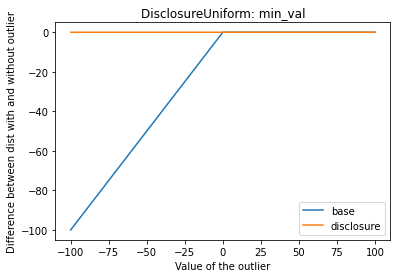

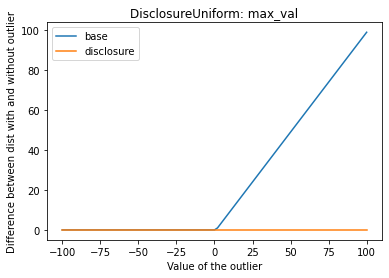

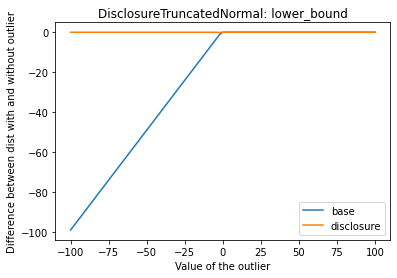

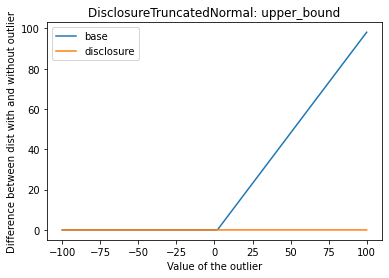

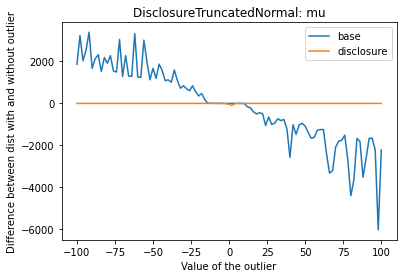

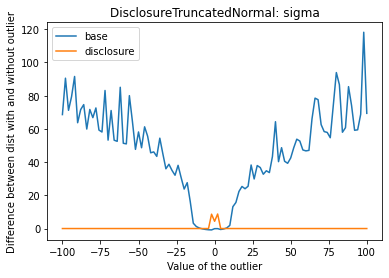

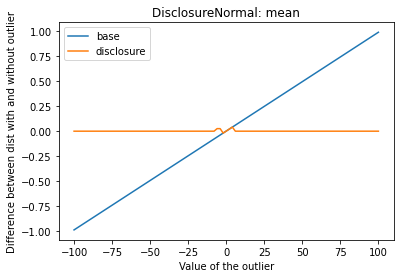

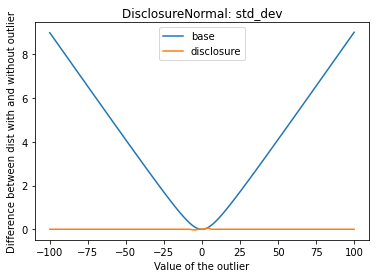

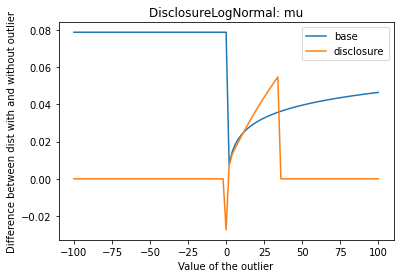

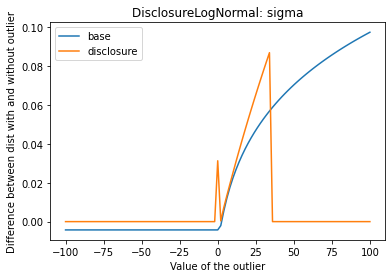

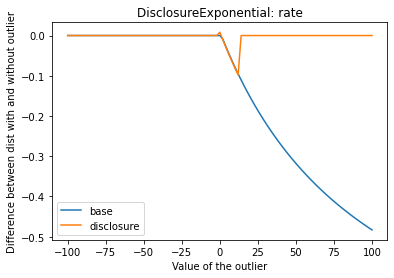

In [7]:
plot_outliers("continuous_distributions")

As we can see, the effect from outliers is much reduced compared to the baseline implementation. For all of the distributions, the change in the result is much smaller when an outlier is added.

### Graphs for all discrete distributions

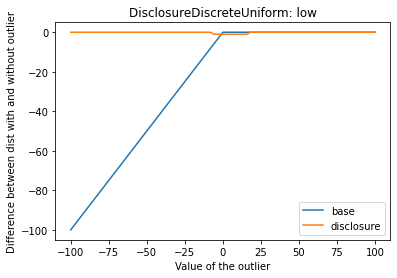

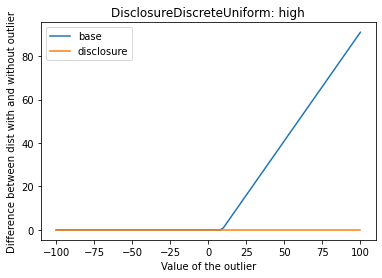

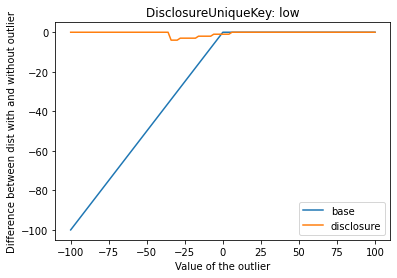

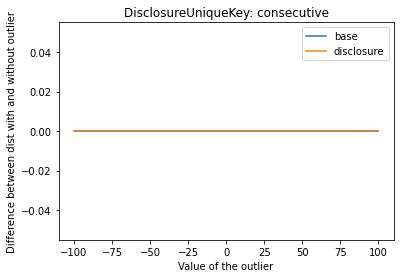

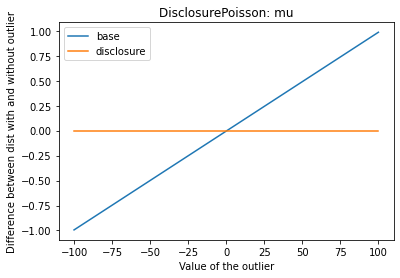

In [8]:
plot_outliers("discrete_distributions")

The same is true for the discrete distributions, only a localized effect is present.